# `shippy`: a platform to import and analyze data on cruise tourism in SE Alaska.

# Tables and figures for the project and their source codes:

## Table 1. Entries to GLBA

* for each entry to Glacier Bay (GLBA), list of vessels with arrival/departure times, fromPort, toPort, distance and times to nextPort, and other relavent information using AIS data from 2023. (258 rows if compatible with CLAA 2023 Calendar)

In [1]:
from app import App
from BoatsData import BoatsData
from BoatData import BoatData
from Cruise import Cruise
from Geoprocessor import Geoprocessor
from PortManager import PortManager
from PathCalculations import PathCalculations
from Mapper import Mapper
from Statistics import Statistics

import matplotlib.pyplot as plt

import pandas as pd
import os


a = App(r'./data/ais_data')

created new cruise for this: NORWEGIAN BLISS_01
created new cruise for this: NORWEGIAN BLISS_02
created new cruise for this: NORWEGIAN JEWEL_01
created new cruise for this: EURODAM_01
created new cruise for this: NORWEGIAN BLISS_03
created new cruise for this: NIEUW AMSTERDAM_01
created new cruise for this: GRAND PRINCESS_01
created new cruise for this: KONINGSDAM_01
created new cruise for this: NORWEGIAN JEWEL_02
created new cruise for this: NORWEGIAN SPIRIT_01
created new cruise for this: CROWN PRINCESS_01
created new cruise for this: EURODAM_02
created new cruise for this: GRAND PRINCESS_02
created new cruise for this: KONINGSDAM_02
created new cruise for this: NORWEGIAN BLISS_04
created new cruise for this: NOORDAM_01
created new cruise for this: NORWEGIAN ENCORE_01
created new cruise for this: RUBY PRINCESS_01
created new cruise for this: NIEUW AMSTERDAM_02
created new cruise for this: NORWEGIAN SPIRIT_02
created new cruise for this: VOLENDAM_01
created new cruise for this: NORWEG

In [2]:
boatsData = a.boatsData
ais_data = boatsData.flatten() # extract all AIS data to one spot
ais_data.mmsi = ais_data.mmsi.astype(int).astype(str)
ais_data.imo = ais_data.imo.astype(int).astype(str)


visit_table, ais_data_glba_to_next_port, ais_data_within_glba, merged = boatsData.run_glba_workflow()

processing NORWEGIAN BLISS
15.813
10.47
15.985
10.641
14.81
11.723
15.268
11.971
15.433
12.438
14.961
12.298
16.188
10.431
processing NORWEGIAN JEWEL
37.191
9.846
37.531
9.366
15.581
9.884
37.684
9.858
2.127
10.615
37.007
11.182
15.775
9.906
16.446
10.061
37.732
10.36
37.851
10.156
38.09
10.072
processing EURODAM
2.121
8.007
2.393
8.191
2.324
8.07
2.492
8.07
2.434
7.687
2.294
8.02
2.283
8.112
2.257
8.194
2.056
8.029
2.159
8.029
2.222
8.194
2.058
114.192
2.361
8.625
2.021
8.963
2.128
7.484
2.549
8.586
2.13
7.628
2.2
7.686
1.996
7.5
2.376
7.511
2.218
7.358
2.084
7.77
processing NIEUW AMSTERDAM
32.507
9.443
10.65
17.021
32.858
9.459
10.563
17.052
28.16
9.151
10.538
14.831
31.119
9.609
11.091
36.706
18.636
10.684
27.988
9.505
10.604
16.671
27.382
9.387
10.613
37.057
19.714
10.396
31.016
9.428
10.771
37.183
32.576
9.391
10.525
36.837
28.343
9.502
13.477
37.328
10.564
17.104
processing GRAND PRINCESS
26.183
9.162
30.435
9.946
10.094
16.338
26.487
9.478
10.235
15.999
31.835
9.664
10.037
31.35

In [ ]:
visit_table[['portAfter']]

,index,date,boatName,mmsi,imo,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,first_ts_in_next_port,mean_sog,max_sog,segment_id
0,6,2023-04-19,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-04-19 06:11:19-08:00,2023-04-19 14:34:25-08:00,16.19,299.91,2023-04-20 06:45:41-08:00,16.323225,22.9,NORWEGIAN_BLISS_5
1,0,2023-04-26,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-04-26 06:13:39-08:00,2023-04-26 15:01:27-08:00,15.81,300.57,2023-04-27 06:50:14-08:00,17.261258,23.5,NORWEGIAN_BLISS_13
2,33,2023-05-02,EURODAM,245206000,9378448,Icy Strait Point,Juneau,2023-05-02 06:35:16-08:00,2023-05-02 15:18:13-08:00,2.55,29.28,2023-05-02 17:51:08-08:00,11.752113,16.1,EURODAM_3
3,1,2023-05-03,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-05-03 06:11:13-08:00,2023-05-03 14:49:12-08:00,15.99,301.96,2023-05-04 06:48:19-08:00,17.163619,22.9,NORWEGIAN_BLISS_19
4,53,2023-05-04,NIEUW AMSTERDAM,246648000,9378450,Ketchikan,Skagway,2023-05-04 05:59:19-08:00,2023-05-04 15:06:28-08:00,19.71,329.22,2023-05-05 10:49:18-08:00,15.493727,22.8,NIEUW_AMSTERDAM_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,4,2023-10-18,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-10-18 07:58:35-08:00,2023-10-18 15:45:29-08:00,15.43,301.17,2023-10-19 07:11:28-08:00,17.323282,23.7,NORWEGIAN_BLISS_219
254,132,2023-10-19,NORWEGIAN ENCORE,311000879,9751511,Ketchikan,Skagway,2023-10-19 07:49:18-08:00,2023-10-19 16:00:01-08:00,15.05,302.49,2023-10-20 07:02:56-08:00,18.044065,24.0,NORWEGIAN_ENCORE_145
255,182,2023-10-24,NORWEGIAN SUN,311109000,9218131,Juneau,Skagway,2023-10-24 07:12:33-08:00,2023-10-24 15:48:46-08:00,14.45,205.99,2023-10-25 06:15:55-08:00,13.812389,20.3,NORWEGIAN_SUN_229
256,5,2023-10-25,NORWEGIAN BLISS,311000710,9751509,Ketchikan,Skagway,2023-10-25 08:04:14-08:00,2023-10-25 15:37:12-08:00,14.96,302.54,2023-10-26 06:34:53-08:00,17.850089,24.3,NORWEGIAN_BLISS_223


In [ ]:
visit_table[visit_table.portAfter == 'Vancouver']

,index,date,boatName,mmsi,imo,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,first_ts_in_next_port,mean_sog,max_sog,segment_id
233,249,2023-09-22,MAJESTIC PRINCESS,232002990,9614141,Vancouver,Icy Strait Point,2023-09-22 06:47:18-08:00,2023-09-22 16:37:22-08:00,16.52,975.52,2023-09-25 09:08:16-08:00,14.096688,20.2,MAJESTIC_PRINCESS_473
236,203,2023-09-24,SAPPHIRE PRINCESS,235103357,9228186,Vancouver,Skagway,2023-09-24 06:50:29-08:00,2023-09-24 15:26:20-08:00,14.74,886.49,2023-09-27 06:10:35-08:00,13.379961,21.6,SAPPHIRE_PRINCESS_197


In [4]:
visit_table.portAfter.value_counts()

Ketchikan           104
Skagway              43
Icy Strait Point     36
Whittier             31
College Fjord        14
Seward                7
Sitka                 5
Juneau                4
Hubbard Glacier       3
Prince Rupert         2
Haines                2
Wrangell              2
Valdez                2
Vancouver             2
Victoria              1
Name: portAfter, dtype: int64

In [15]:
ais_data_glba_to_next_port.next_port.value_counts()

Ketchikan           54768
Whittier            29566
Skagway             15181
College Fjord       10210
Icy Strait Point     7475
Seward               6307
Juneau               3302
Valdez               3293
Vancouver            2956
Sitka                2698
Haines               1346
Prince Rupert        1314
Hubbard Glacier      1244
Wrangell              924
Victoria              840
Name: next_port, dtype: int64

In [7]:
van = visit_table[visit_table['portAfter'] == 'Vancouver']
van

,index,date,boatName,mmsi,imo,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,mean_sog,max_sog,segment_id
233,249,2023-09-22,MAJESTIC PRINCESS,232002990,9614141,Vancouver,Icy Strait Point,2023-09-22 06:47:18-08:00,2023-09-22 16:37:22-08:00,16.52,975.52,14.096688,20.2,MAJESTIC_PRINCESS_473
236,203,2023-09-24,SAPPHIRE PRINCESS,235103357,9228186,Vancouver,Skagway,2023-09-24 06:50:29-08:00,2023-09-24 15:26:20-08:00,14.74,886.49,13.379961,21.6,SAPPHIRE_PRINCESS_197


#### Export ais_data as line shapefile to view all imported boatData within GIS

In [3]:
Geoprocessor.boatsDataToLinesShapefile(boatsData, r'./out/boatData/boatDataLineShapefile.shp')


In [4]:
visit_count_table = visit_table.boatName.value_counts()
visit_count_table

NORWEGIAN ENCORE     25
KONINGSDAM           22
EURODAM              22
NIEUW AMSTERDAM      21
GRAND PRINCESS       20
SAPPHIRE PRINCESS    20
ROYAL PRINCESS       20
VOLENDAM             20
MAJESTIC PRINCESS    19
NOORDAM              19
NORWEGIAN JEWEL      11
NORWEGIAN SUN         8
NORWEGIAN BLISS       7
RUBY PRINCESS         7
QUEEN ELIZABETH       6
VIKING ORION          4
SEABOURN ODYSSEY      4
NORWEGIAN SPIRIT      2
CROWN PRINCESS        1
Name: boatName, dtype: int64

In [ ]:
popular_next_ports_table = visit_table.portAfter.value_counts()
popular_next_ports_table

### Table 1a. merged table with scheduled times from CLAA pdf

In [6]:
merged

,date,boatName,portAfter,nextPort,portBefore,ts_in_ais,ts_in_claa,ts_out_ais,ts_out_claa
0,2023-04-26,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-04-26 06:13:39-08:00,2023-04-26 06:00:00,2023-04-26 15:01:27-08:00,2023-04-26 15:00:00
1,2023-05-03,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-05-03 06:11:13-08:00,2023-05-03 06:00:00,2023-05-03 14:49:12-08:00,2023-05-03 15:00:00
2,2023-10-04,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-10-04 07:24:54-08:00,2023-10-04 06:00:00,2023-10-04 15:28:45-08:00,2023-10-04 15:00:00
3,2023-10-11,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-10-11 07:40:02-08:00,2023-10-11 06:00:00,2023-10-11 15:14:09-08:00,2023-10-11 15:00:00
4,2023-10-18,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-10-18 07:58:35-08:00,2023-10-18 06:00:00,2023-10-18 15:45:29-08:00,2023-10-18 15:00:00
...,...,...,...,...,...,...,...,...,...
275,2023-07-24,QUEEN ELIZABETH,Victoria,AT SEA,Skagway,2023-07-24 06:03:35-08:00,2023-07-24 06:00:00,2023-07-24 15:01:54-08:00,2023-07-24 15:00:00
276,2023-07-30,QUEEN ELIZABETH,Haines,HUBBARD GLACIER,Sitka,2023-07-30 06:55:40-08:00,2023-07-30 07:00:00,2023-07-30 17:05:23-08:00,2023-07-30 17:00:00
277,2023-08-13,QUEEN ELIZABETH,Sitka,SITKA,Skagway,2023-08-13 07:06:12-08:00,2023-08-13 07:00:00,2023-08-13 17:02:28-08:00,2023-08-13 17:00:00
278,2023-06-16,QUEEN ELIZABETH,Ketchikan,KETCHIKAN,Juneau,2023-06-16 07:11:41-08:00,2023-06-16 07:00:00,2023-06-16 16:01:57-08:00,2023-06-16 16:00:00


## Table 2. Summary statistics

*  __for each port after GLBA__: 
_mean, std, count_ for AIS data (leg from GLBA to nextPort): 'sog', 'distanceToNextPort', 'timeToNextPort'

In [7]:
summary_table_groupby_next_port = Statistics.summary_table2(visit_table, 'portAfter',
                                                          ['mean_sog', 'timeTo', 'distTo'], ['mean','std','count'])
summary_table_groupby_next_port

,portAfter,mean_sog_mean,mean_sog_std,mean_sog_count,timeTo_mean,timeTo_std,timeTo_count,distTo_mean,distTo_std,distTo_count
0,College Fjord,15.919170,0.707557,14,3.411429,0.869968,14,476.065000,3.292969,14
1,Haines,11.533295,2.722576,2,13.180000,0.664680,2,324.780000,260.116301,2
2,Hubbard Glacier,13.236087,0.447790,3,15.933333,0.457420,3,198.853333,3.944874,3
3,Icy Strait Point,12.011863,1.596100,36,4.050833,5.126022,36,43.049444,39.381160,36
4,Juneau,12.984979,2.501495,4,15.740000,3.716001,4,320.207500,279.849053,4
5,Ketchikan,16.468560,1.325633,104,17.244808,2.001086,104,304.573942,6.937492,104
6,Prince Rupert,16.624561,0.202767,2,20.825000,0.091924,2,399.915000,2.778930,2
7,Seward,13.839973,0.351985,7,13.582857,0.375265,7,543.540000,8.864218,7
8,Sitka,10.520784,0.724476,5,14.258000,1.556926,5,149.446000,14.399807,5
9,Skagway,10.774321,1.222777,43,11.437907,1.999827,43,130.125581,34.976723,43


## Table 3.  Vessels in CLAA database via _mmsi_

In [8]:
ais_unique_vessels = ais_data[['name', 'mmsi', 'imo']].drop_duplicates()
ais_unique_vessels.reset_index()

,index,name,mmsi,imo
0,0,NORWEGIAN BLISS,311000710,9751509
1,68019,NORWEGIAN JEWEL,311827000,9304045
2,140800,EURODAM,245206000,9378448
3,200460,NIEUW AMSTERDAM,246648000,9378450
4,261280,GRAND PRINCESS,310327000,9104005
5,324925,KONINGSDAM,244830547,9692557
6,380510,NORWEGIAN SPIRIT,311746000,9141065
7,442661,CROWN PRINCESS,310500000,9293399
8,495800,NOORDAM,246028000,9230115
9,560320,NORWEGIAN ENCORE,311000879,9751511


In [9]:
claa_df = pd.read_csv('./data/calendar/allyears_allports_claa.csv')
ports = claa_df.sort_values(by='date')
ports 

,Unnamed: 0,date,boatName,portCode,ts_in,ts_out,portName,nextPort
24148,24148,2008-04-27,NORWEGIAN STAR,VAN,2008-04-27 07:00:00,2008-04-27 17:00:00,VANCOUVER,AT SEA
23685,23685,2008-04-27,MERCURY,SFO,2008-04-27 07:00:00,2008-04-27 17:00:00,SAN FRANCISCO,AT SEA
23686,23686,2008-04-28,MERCURY,AS,2008-04-28 06:00:00,2008-04-28 22:00:00,AT SEA,AT SEA
23399,23399,2008-04-28,INFINITY,SFO,2008-04-28 07:00:00,2008-04-28 17:00:00,SAN FRANCISCO,AT SEA
24149,24149,2008-04-28,NORWEGIAN STAR,AS,2008-04-28 06:00:00,2008-04-28 22:00:00,AT SEA,KETCHIKAN
...,...,...,...,...,...,...,...,...
40516,40516,2023-10-28,NORWEGIAN SUN,AS,2023-10-28 06:00:00,2023-10-28 22:00:00,AT SEA,VICTORIA
40042,40042,2023-10-28,NORWEGIAN ENCORE,VIC,2023-10-28 20:00:00,2023-10-28 23:59:00,VICTORIA,SEATTLE
40517,40517,2023-10-29,NORWEGIAN SUN,VIC,2023-10-29 08:00:00,2023-10-29 18:00:00,VICTORIA,SEATTLE
40043,40043,2023-10-29,NORWEGIAN ENCORE,SEA,2023-10-29 06:00:00,2023-10-29 17:00:00,SEATTLE,NaN


### Histogram: number of unique ships in each year across all years

In [10]:
import matplotlib.pyplot as plt

portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ports = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ship_calls' : unique_ports}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

KeyError: 'year'

## Table 4. Historical port calls from 2008-2024

In [11]:
ports = claa_df[['date', 'boatName','portName', 'nextPort']]
ports = ports[ports['portName']!= 'AT SEA']
ports[['mmsi', 'imo', 'length', 'width', 'pax', 'gross_tonnage']] = None
ports['year'] = pd.to_datetime(ports['date']).dt.year

ports


,date,boatName,portName,nextPort,mmsi,imo,length,width,pax,gross_tonnage,year
0,2010-05-03,AMSTERDAM,SEATTLE,AT SEA,None,None,None,None,None,None,2010
2,2010-05-05,AMSTERDAM,GLACIER BAY,JUNEAU,None,None,None,None,None,None,2010
3,2010-05-06,AMSTERDAM,JUNEAU,SITKA,None,None,None,None,None,None,2010
4,2010-05-07,AMSTERDAM,SITKA,KETCHIKAN,None,None,None,None,None,None,2010
5,2010-05-08,AMSTERDAM,KETCHIKAN,VICTORIA,None,None,None,None,None,None,2010
...,...,...,...,...,...,...,...,...,...,...,...
68370,2019-09-27,WESTERDAM,KETCHIKAN,AT SEA,None,None,None,None,None,None,2019
68372,2019-09-29,WESTERDAM,VANCOUVER,AT SEA,None,None,None,None,None,None,2019
68374,2019-10-01,WESTERDAM,JUNEAU,NaN,None,None,None,None,None,None,2019
68375,2019-09-10,WORLD OF RESIDENSE,NOME,NOME,None,None,None,None,None,None,2019


### Histogram: number of unique ports in each year across all years

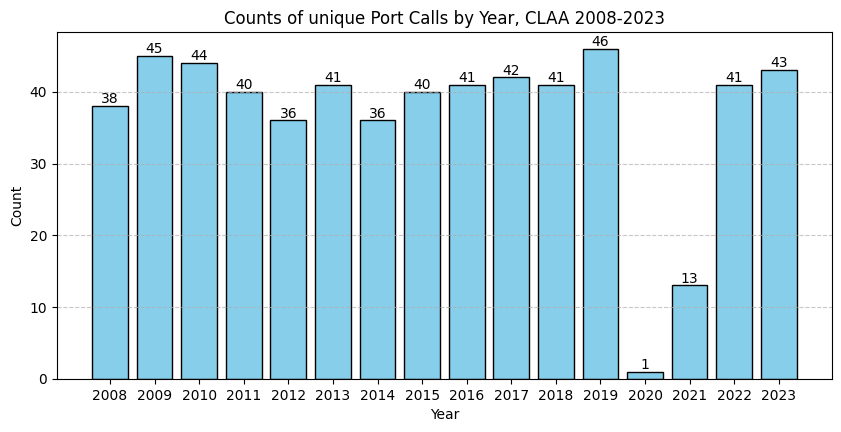

In [12]:
import matplotlib.pyplot as plt
portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ports = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ports' : unique_ports}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

### Table 4a. for each port, year: count vessels (unique or total?), total max pax, firstOfSeason, lastOfSeason, 

In [13]:
### Calculate statistics per port per year and display table
# ports = claa_df with a few append cols
ports = ports[['date', 'boatName', 'portName', 'year', 'pax', 'length', 'width', 'gross_tonnage']]

stats_list = []
grouped = ports.groupby(['portName', 'year'])

for (port, year), group in grouped:
    first_call = min(group.date)
    last_call = max(group.date)

    cumulative_pax = group['pax'].sum()
    count_calls = group['boatName'].count()
    mean_width = group['width'].mean()
    mean_length = group['length'].mean()
    count_unique = len(group['boatName'].unique())
    
    stats = {
        'portName': port,
        'year': year,
        'count_calls' : count_calls,
        'count_unique' : count_unique, # number of unique boats visiting each port per year
        'max_pax' : cumulative_pax,
        'first_call' : first_call,
        'last_call' : last_call,
        'mean_width' : mean_width,
        'mean_length' : mean_length
    }
    stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
stats_df


,portName,year,count_calls,count_unique,max_pax,first_call,last_call,mean_width,mean_length
0,ADAK,2008,1,1,0,2008-09-09,2008-09-09,NaN,NaN
1,ADAK,2009,1,1,0,2009-09-13,2009-09-13,NaN,NaN
2,ADAK,2010,1,1,0,2010-08-04,2010-08-04,NaN,NaN
3,ADAK,2011,1,1,0,2011-06-24,2011-06-24,NaN,NaN
4,ADAK,2012,1,1,0,2012-07-07,2012-07-07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
583,WRANGELL,2018,30,5,0,2018-05-25,2018-10-03,NaN,NaN
584,WRANGELL,2019,37,8,0,2019-05-21,2019-10-03,NaN,NaN
585,WRANGELL,2021,3,1,0,2021-08-01,2021-09-12,NaN,NaN
586,WRANGELL,2022,62,10,0,2022-05-12,2022-09-25,NaN,NaN


In [20]:
t = stats_df[stats_df['portName'] == 'GLACIER BAY']
t

,portName,year,count_calls,count_unique,max_pax,first_call,last_call,mean_width,mean_length
134,GLACIER BAY,2008,225,16,0,2008-05-06,2008-09-23,NaN,NaN
135,GLACIER BAY,2009,224,16,0,2009-04-29,2009-09-28,NaN,NaN
136,GLACIER BAY,2010,220,15,0,2010-05-05,2010-09-27,NaN,NaN
137,GLACIER BAY,2011,200,14,0,2011-05-10,2011-09-22,NaN,NaN
138,GLACIER BAY,2012,210,16,0,2012-04-13,2012-09-26,NaN,NaN
139,GLACIER BAY,2013,233,16,0,2013-04-26,2013-09-26,NaN,NaN
140,GLACIER BAY,2014,230,14,0,2014-04-27,2014-09-26,NaN,NaN
141,GLACIER BAY,2015,222,17,0,2015-05-05,2015-09-25,NaN,NaN
142,GLACIER BAY,2016,225,16,0,2016-04-28,2016-10-02,NaN,NaN
143,GLACIER BAY,2017,241,19,0,2017-05-02,2017-10-01,NaN,NaN


### Table 4b. __Dynamic Table__: For _PortA_, for each year and each next port of call outside of _PortA_, include count of ships, distance to travel, 

## Table 5. Glaciers as destinations

* for each year, count of visits to a port call with a glacier: (GLBA, Hubbard, College Fjord, Endicot, Tracey)

## Map 1: representative routes for each port call after GLBA, heatmap style from 2023 AIS data

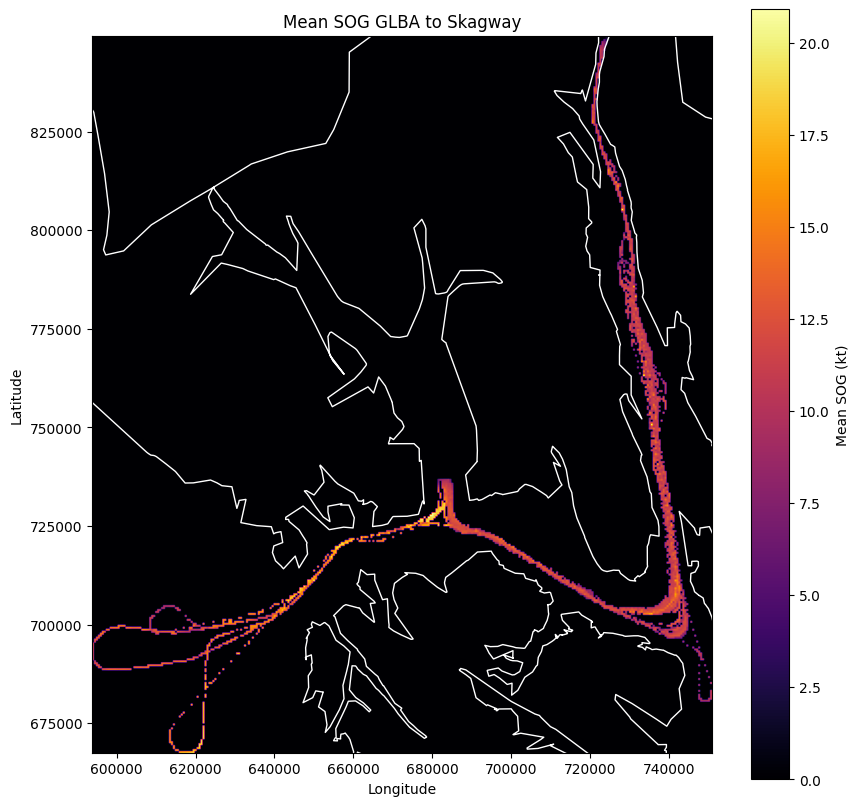

In [25]:
rasters_dict = Mapper(ais_data_glba_to_next_port).writeRasters('next_port', 'sog')
Mapper.plotRaster('Skagway', rasters_dict)


## __Next Stage__: Assessing management alternatives.

### Table 6. produce table with appended fields showing new avg sog, emissions factors, etc, for each alternative (15 min, 30 min, etc.)


#### Demonstrate adjustments for leg from GLBA to next Port

In [7]:
assert(len(ais_data_glba_to_next_port.segment_id.unique()) == 258) # confirm we have all the data we need
alts_after_glba = Geoprocessor.generate_management_alternatives(ais_data_glba_to_next_port, 'segment_id', [-30, 15, 30, 60])
for key, value in alts_after_glba.items():
    #print(key, ' ', len(value))
    pass

In [8]:
test = alts_after_glba['VOLENDAM_99_inc_60']
test[['bs_ts', 'bs_ts_new', 'delta_t', 'delta_t_new', 'sog', 'sog_new', 'name', 'next_port']]

,bs_ts,bs_ts_new,delta_t,delta_t_new,sog,sog_new,name,next_port
0,2023-07-23 15:03:29-08:00,2023-07-23 15:03:29-08:00,NaN,NaN,11.8,11.217276,VOLENDAM,Ketchikan
1,2023-07-23 15:03:49-08:00,2023-07-23 15:03:50.038976060-08:00,0.333333,0.350650,12.1,11.502461,VOLENDAM,Ketchikan
2,2023-07-23 15:04:09-08:00,2023-07-23 15:04:11.077952060-08:00,0.333333,0.350650,12.4,11.787646,VOLENDAM,Ketchikan
3,2023-07-23 15:04:29-08:00,2023-07-23 15:04:32.116928120-08:00,0.333333,0.350650,12.7,12.072831,VOLENDAM,Ketchikan
4,2023-07-23 15:05:09-08:00,2023-07-23 15:05:14.194880180-08:00,0.666667,0.701299,13.3,12.643201,VOLENDAM,Ketchikan
...,...,...,...,...,...,...,...,...
525,2023-07-24 10:14:59-08:00,2023-07-24 11:14:48.142700480-08:00,0.666667,0.701299,1.9,1.806172,VOLENDAM,Ketchikan
526,2023-07-24 10:15:32-08:00,2023-07-24 11:15:22.857010940-08:00,0.550000,0.578572,1.4,1.330863,VOLENDAM,Ketchikan
527,2023-07-24 10:16:19-08:00,2023-07-24 11:16:12.298604600-08:00,0.783333,0.824027,1.0,0.950617,VOLENDAM,Ketchikan
528,2023-07-24 10:18:00-08:00,2023-07-24 11:17:58.545433580-08:00,1.683333,1.770780,0.8,0.760493,VOLENDAM,Ketchikan


#### Demonstrate adjustments for leg within GLBA

In [4]:
ais_data_within_glba
assert(len(ais_data_within_glba.segment_id.unique()) == 258) # confirm we have all the data we need
alts_within_glba = Geoprocessor.generate_management_alternatives(ais_data_within_glba, 'segment_id', [-15, 15])
#alts_within_glba



In [9]:
test = alts_within_glba['VOLENDAM_99_inc_15']
test[['bs_ts', 'bs_ts_new', 'delta_t', 'delta_t_new', 'sog', 'sog_new', 'name', 'next_port']]


,bs_ts,bs_ts_new,delta_t,delta_t_new,sog,sog_new,name,next_port
0,2023-07-23 06:10:01-08:00,2023-07-23 06:10:01-08:00,NaN,NaN,11.9,11.574349,VOLENDAM,Ketchikan
1,2023-07-23 06:10:15-08:00,2023-07-23 06:10:15.393897700-08:00,0.233333,0.239898,11.9,11.574349,VOLENDAM,Ketchikan
2,2023-07-23 06:10:40-08:00,2023-07-23 06:10:41.097286480-08:00,0.416667,0.428390,11.9,11.574349,VOLENDAM,Ketchikan
3,2023-07-23 06:11:01-08:00,2023-07-23 06:11:02.688133060-08:00,0.350000,0.359847,12.0,11.671613,VOLENDAM,Ketchikan
4,2023-07-23 06:11:30-08:00,2023-07-23 06:11:32.504064039-08:00,0.483333,0.496932,12.0,11.671613,VOLENDAM,Ketchikan
...,...,...,...,...,...,...,...,...
287,2023-07-23 15:01:38-08:00,2023-07-23 15:16:35.439664900-08:00,0.333333,0.342712,10.3,10.018134,VOLENDAM,Ketchikan
288,2023-07-23 15:01:59-08:00,2023-07-23 15:16:57.030511420-08:00,0.350000,0.359847,10.5,10.212661,VOLENDAM,Ketchikan
289,2023-07-23 15:02:18-08:00,2023-07-23 15:17:16.565086900-08:00,0.316667,0.325576,10.8,10.504451,VOLENDAM,Ketchikan
290,2023-07-23 15:02:49-08:00,2023-07-23 15:17:48.437288980-08:00,0.516667,0.531203,11.3,10.990769,VOLENDAM,Ketchikan


#### Merging alternate data (new _sog_ and _bs_ts_) into empirical AIS data tables by unique segment_id

In [9]:
# start with subset from GLBA to next port

after_glba_data_list = [] # empty list to store segment results with management alternative values
df_to_merge = pd.DataFrame()
for key, data in alts_after_glba.items():
    if '_inc_60' in key:
        merge_key = key[:-7]
        #print(data.columns)
        after_glba_data_list.append(data[['segment_id', 'bs_ts', 'bs_ts_new', 'sog', 'sog_new', 'delta_t', 'delta_t_new']])
df_to_merge = pd.concat([pd.DataFrame(df) for df in after_glba_data_list], ignore_index=True)
#print(ais_data_glba_to_next_port.columns)
#print(df_to_merge)
merged_alt_ais_after_glba = ais_data_glba_to_next_port.merge(df_to_merge,
                            on=['segment_id', 'bs_ts'], how='inner', suffixes=('_ais', '_alt'))

merged_alt_ais_after_glba[['bs_ts','name','sog_ais','next_port','segment_id','sog_alt','sog_new','bs_ts_new']]

,bs_ts,name,sog_ais,next_port,segment_id,sog_alt,sog_new,bs_ts_new
0,2023-04-26 15:01:57-08:00,NORWEGIAN BLISS,9.0,Ketchikan,NORWEGIAN_BLISS_13,9.0,8.458990,2023-04-26 15:01:57-08:00
1,2023-04-26 15:02:37-08:00,NORWEGIAN BLISS,9.7,Ketchikan,NORWEGIAN_BLISS_13,9.7,9.116912,2023-04-26 15:02:39.558271740-08:00
2,2023-04-26 15:03:07-08:00,NORWEGIAN BLISS,10.2,Ketchikan,NORWEGIAN_BLISS_13,10.2,9.586855,2023-04-26 15:03:11.476975560-08:00
3,2023-04-26 15:03:46-08:00,NORWEGIAN BLISS,10.8,Ketchikan,NORWEGIAN_BLISS_13,10.8,10.150788,2023-04-26 15:03:52.971290520-08:00
4,2023-04-26 15:04:16-08:00,NORWEGIAN BLISS,11.3,Ketchikan,NORWEGIAN_BLISS_13,11.3,10.620732,2023-04-26 15:04:24.889994340-08:00
...,...,...,...,...,...,...,...,...
141419,2023-06-27 10:27:14-08:00,QUEEN ELIZABETH,1.4,Ketchikan,QUEEN_ELIZABETH_75,1.4,1.327024,2023-06-27 11:27:00.251985800-08:00
141420,2023-06-27 10:29:33-08:00,QUEEN ELIZABETH,1.1,Ketchikan,QUEEN_ELIZABETH_75,1.1,1.042662,2023-06-27 11:29:26.895881720-08:00
141421,2023-06-27 10:29:53-08:00,QUEEN ELIZABETH,0.9,Ketchikan,QUEEN_ELIZABETH_75,0.9,0.853087,2023-06-27 11:29:47.995722860-08:00
141422,2023-06-27 10:31:13-08:00,QUEEN ELIZABETH,0.5,Ketchikan,QUEEN_ELIZABETH_75,0.5,0.473937,2023-06-27 11:31:12.395087360-08:00


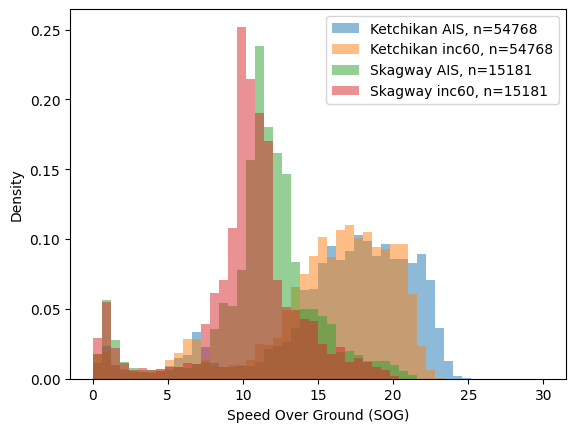

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual DataFrame)
#data = {'sog': np.random.normal(loc=5, size=100),
#        'boat': np.random.choice(['Boat A', 'Boat B', 'Boat C'], size=100)}

data = merged_alt_ais_after_glba

df = pd.DataFrame(data)

# Extract 'sog' data for each category
sog_boatA = df[df['next_port'] == 'Ketchikan']['sog_ais']
sog_boatB = df[df['next_port'] == 'Ketchikan']['sog_new']
sog_boatC = df[df['next_port'] == 'Skagway']['sog_ais']
sog_boatD = df[df['next_port'] == 'Skagway']['sog_new']


# Plot histograms for each boat's sog
_, bins, _ = plt.hist(sog_boatA, bins=50, range=[0, 30], density=True, alpha=0.5, label=f"Ketchikan AIS, n={len(sog_boatA)}")
_ = plt.hist(sog_boatB, bins=bins, density=True, alpha=0.5, label=f"Ketchikan inc60, n={len(sog_boatB)}")
_ = plt.hist(sog_boatC, bins=bins, density=True, alpha=0.5, label=f"Skagway AIS, n={len(sog_boatC)}")
_ = plt.hist(sog_boatD, bins=bins, density=True, alpha=0.5, label=f"Skagway inc60, n={len(sog_boatD)}")

# Add labels and legend
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

### Step 1: Emissions in the Actual Scenario

The total emissions in the actual scenario consist of both variable emissions (due to fuel consumption dependent on speed) and fixed emissions (due to auxiliary loads, such as powering lights):

$$
E_{\text{total, actual}} = E_{\text{var, actual}} + E_{\text{fixed, actual}}
$$

#### 1.1 Variable Emissions:

The variable emissions are based on the speed \( S_{\text{actual}} \) over time, and the fuel consumption rate \( F(S) \) is a function of speed:

$$
E_{\text{var, actual}} = \int_0^{t_{\text{actual}}} F(S_{\text{actual}}(t)) \, dt
$$

We assume the fuel consumption $ F(S) $ follows a power law:

$$
F(S) = a \cdot S^b
$$

Where:
- \( a \) is a constant related to the fuel consumption rate,
- \( b \) is typically greater than 1 (often around 2), reflecting that fuel consumption increases non-linearly with speed.

Thus, the variable emissions become:

$$
E_{\text{var, actual}} = \int_0^{t_{\text{actual}}} a \cdot S_{\text{actual}}(t)^b \, dt
$$




#### 1.2 Fixed Emissions:

The fixed emissions are due to the constant auxiliary load $ P_{\text{fixed}} $ running over the duration $ t_{\text{actual}} $:

$$
E_{\text{fixed, actual}} = P_{\text{fixed}} \cdot t_{\text{actual}}
$$



### Step 2: Emissions in the Adjusted Scenario

When the trip duration is adjusted, the speed $ S_{\text{adjusted}} $ decreases, and the total time increases to $ t_{\text{adjusted}} = t_{\text{actual}} + 60 $. The total emissions in the adjusted scenario are:

$$
E_{\text{total, adjusted}} = E_{\text{var, adjusted}} + E_{\text{fixed, adjusted}}
$$



#### 2.1 Variable Emissions (Adjusted Speed):

The variable emissions in the adjusted scenario depend on the adjusted speed $ S_{\text{adjusted}} $:

$$
E_{\text{var, adjusted}} = \int_0^{t_{\text{adjusted}}} F(S_{\text{adjusted}}(t)) \, dt
$$

With the fuel consumption modeled as before:

$$
E_{\text{var, adjusted}} = \int_0^{t_{\text{adjusted}}} a \cdot S_{\text{adjusted}}(t)^b \, dt
$$


#### 2.2 Fixed Emissions:

Since the fixed power consumption $ P_{\text{fixed}} $ operates for a longer time, the fixed emissions increase:

$$
E_{\text{fixed, adjusted}} = P_{\text{fixed}} \cdot t_{\text{adjusted}} = P_{\text{fixed}} \cdot (t_{\text{actual}} + 60)
$$



### Step 3: Total Emissions Difference

To compare emissions between the actual and adjusted scenarios, we calculate the difference in total emissions:

$$
\Delta E = E_{\text{total, adjusted}} - E_{\text{total, actual}}
$$

Substituting the expressions for total emissions:

$$
\Delta E = \left( \int_0^{t_{\text{adjusted}}} a \cdot S_{\text{adjusted}}^b \, dt - \int_0^{t_{\text{actual}}} a \cdot S_{\text{actual}}^b \, dt \right) + P_{\text{fixed}} \cdot 60
$$





### Step 4: Optimization of $ t_{\text{adjusted}} $

The optimization problem seeks to minimize the total emissions as a function of $ t_{\text{adjusted}} $. To find the optimal $ t_{\text{adjusted}} $, we set the derivative of total emissions with respect to $ t_{\text{adjusted}} $ to zero:

$$
\frac{dE_{\text{total}}}{dt_{\text{adjusted}}} = 0
$$

This gives us the point at which further increases in time no longer reduce emissions and instead lead to greater emissions due to the fixed load being active for longer.

In [6]:
# continue with subset within GLBA

within_glba_data_list = [] # empty list to store segment results with management alternative values
df_to_merge = pd.DataFrame()
for key, data in alts_within_glba.items():
    if '_inc_15' in key:
        merge_key = key[:-7]
        #print(data.columns)
        within_glba_data_list.append(data[['segment_id', 'bs_ts', 'bs_ts_new', 'sog', 'sog_new', 'delta_t', 'delta_t_new']])
df_to_merge = pd.concat([pd.DataFrame(df) for df in within_glba_data_list], ignore_index=True)
#print(ais_data_glba_to_next_port.columns)
#print(df_to_merge)
merged_alt_ais_within_glba = ais_data_within_glba.merge(df_to_merge,
                            on=['segment_id', 'bs_ts'], how='inner', suffixes=('_ais', '_alt'))

merged_alt_ais_within_glba[['bs_ts','name','sog_ais','next_port','segment_id','sog_alt','sog_new','bs_ts_new']]

,bs_ts,name,sog_ais,next_port,segment_id,sog_alt,sog_new,bs_ts_new
0,2023-04-19 06:11:19-08:00,NORWEGIAN BLISS,12.1,Ketchikan,NORWEGIAN_BLISS_5,12.1,11.749682,2023-04-19 06:11:19-08:00
1,2023-04-19 06:11:49-08:00,NORWEGIAN BLISS,12.3,Ketchikan,NORWEGIAN_BLISS_5,12.3,11.943891,2023-04-19 06:11:49.894454380-08:00
2,2023-04-19 06:12:49-08:00,NORWEGIAN BLISS,12.8,Ketchikan,NORWEGIAN_BLISS_5,12.8,12.429415,2023-04-19 06:12:51.683363140-08:00
3,2023-04-19 06:13:48-08:00,NORWEGIAN BLISS,13.3,Ketchikan,NORWEGIAN_BLISS_5,13.3,12.914939,2023-04-19 06:13:52.442456740-08:00
4,2023-04-19 06:14:48-08:00,NORWEGIAN BLISS,13.8,Ketchikan,NORWEGIAN_BLISS_5,13.8,13.400463,2023-04-19 06:14:54.231365560-08:00
...,...,...,...,...,...,...,...,...
64316,2023-08-13 16:59:29-08:00,QUEEN ELIZABETH,8.6,Sitka,QUEEN_ELIZABETH_209,8.6,8.388963,2023-08-13 17:14:24.496981200-08:00
64317,2023-08-13 17:00:18-08:00,QUEEN ELIZABETH,9.1,Sitka,QUEEN_ELIZABETH_209,9.1,8.876693,2023-08-13 17:15:14.729651160-08:00
64318,2023-08-13 17:01:18-08:00,QUEEN ELIZABETH,9.6,Sitka,QUEEN_ELIZABETH_209,9.6,9.364424,2023-08-13 17:16:16.239042960-08:00
64319,2023-08-13 17:01:58-08:00,QUEEN ELIZABETH,9.8,Sitka,QUEEN_ELIZABETH_209,9.8,9.559516,2023-08-13 17:16:57.245304120-08:00


#### Determine the congruence between 'destination' and 'next port'

In [37]:
bliss = merged_alt_ais_after_glba[['bs_ts','name','sog_ais','destination','next_port','segment_id','sog_alt','sog_new','bs_ts_new']]

bliss = bliss[bliss.name == 'NORWEGIAN BLISS']
groups = bliss.groupby('segment_id')
for group_id, group in groups:
    print(group)

                        bs_ts             name  sog_ais    destination  \
0   2023-04-26 15:01:57-08:00  NORWEGIAN BLISS      9.0     JUNEAU, AK   
1   2023-04-26 15:02:37-08:00  NORWEGIAN BLISS      9.7     JUNEAU, AK   
2   2023-04-26 15:03:07-08:00  NORWEGIAN BLISS     10.2     JUNEAU, AK   
3   2023-04-26 15:03:46-08:00  NORWEGIAN BLISS     10.8     JUNEAU, AK   
4   2023-04-26 15:04:16-08:00  NORWEGIAN BLISS     11.3     JUNEAU, AK   
..                        ...              ...      ...            ...   
488 2023-04-27 06:39:14-08:00  NORWEGIAN BLISS      0.7  VICTORIA, CAN   
489 2023-04-27 06:39:24-08:00  NORWEGIAN BLISS      0.7  VICTORIA, CAN   
490 2023-04-27 06:39:34-08:00  NORWEGIAN BLISS      0.6  VICTORIA, CAN   
491 2023-04-27 06:39:55-08:00  NORWEGIAN BLISS      0.6  VICTORIA, CAN   
492 2023-04-27 06:40:05-08:00  NORWEGIAN BLISS      0.5  VICTORIA, CAN   

     next_port          segment_id  sog_alt    sog_new  \
0    Ketchikan  NORWEGIAN BLISS_13      9.0   8.85836

In [ ]:
for key, value in alts_within_glba.items():
    #print(key, ' ', len(value))
    pass

### Map 2: apply __management alternatives__ to AIS data to plot updated speeds onto maps to each port after GLBA

#### Produce and plot rasters showing new speeds after applying management alternatives

In [29]:
rasters_actual_sog = Mapper(merged_alt_ais_after_glba).writeRasters('next_port', 'sog_ais')
rasters_adjusted_sog = Mapper(merged_alt_ais_after_glba).writeRasters('next_port', 'sog_new')

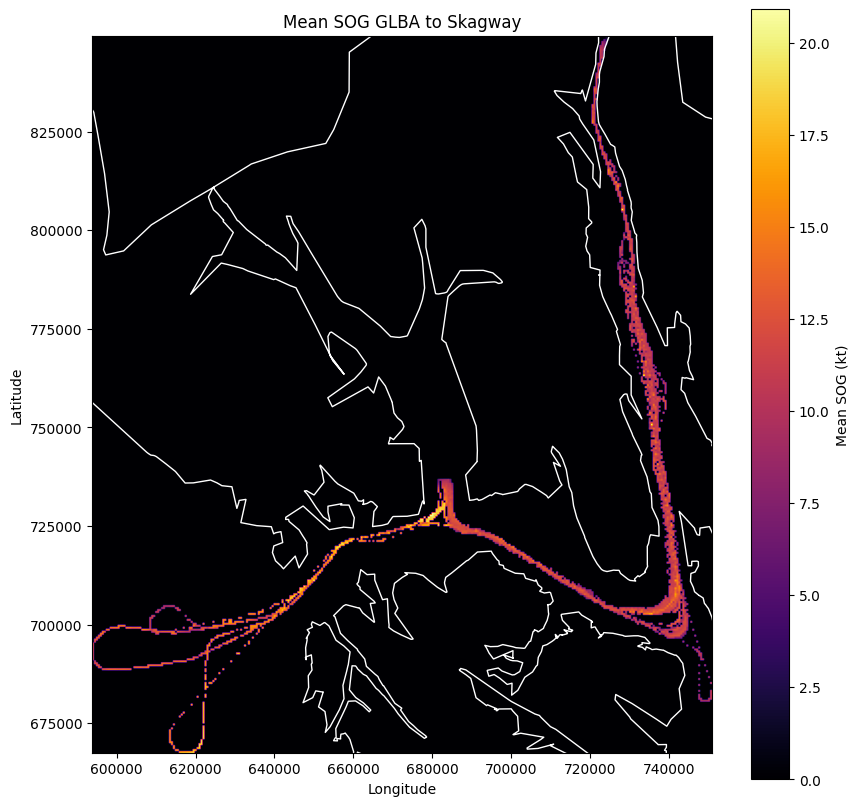

Max actual sog in the data: 25.0


In [30]:
Mapper.plotRaster('Skagway', rasters_actual_sog)
print(f'Max actual sog in the data: {merged_alt_ais_after_glba.sog_ais.max()}')


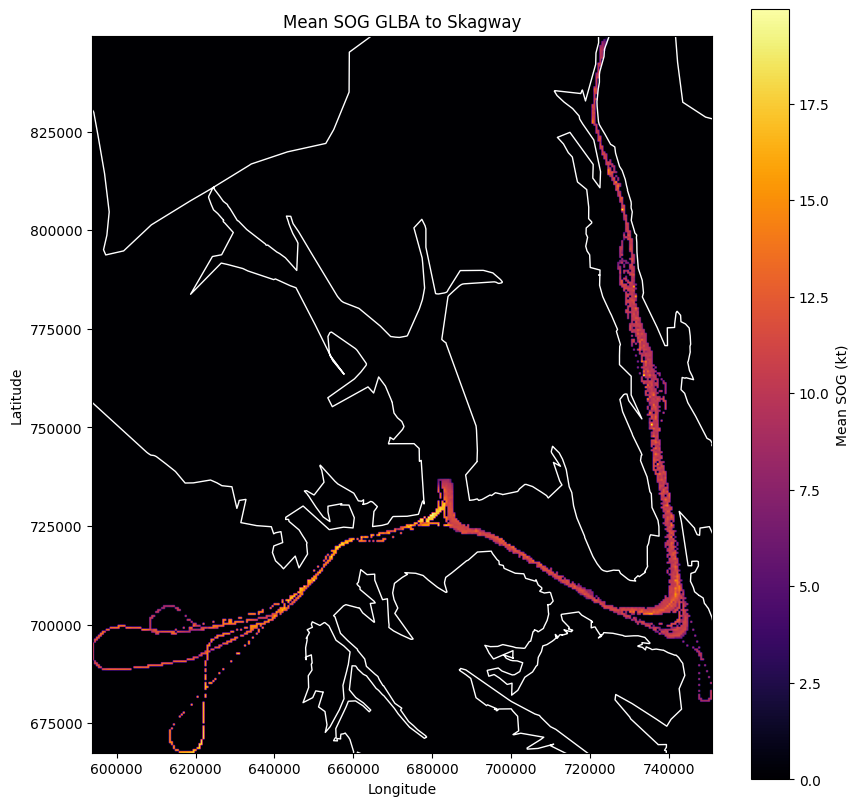

Max actual sog in the data: 23.451319819664796


In [31]:
Mapper.plotRaster('Skagway', rasters_adjusted_sog)
print(f'Max actual sog in the data: {merged_alt_ais_after_glba.sog_new.max()}')



In [ ]:
from Mapper import Mapper

#instantiate and write rasters to output folder as well as store their info in dict for plotting
rasters_dict_after_glba = Mapper(ais_data_glba_to_next_port).writeRasters('next_port', 'sog')
rasters_dict_within_glba = Mapper(ais_data_within_glba).writeRasters('next_port', 'sog')


In [ ]:
Mapper.plotRaster('Skagway', alt_rasters_dict_within_glba)

In [ ]:
Mapper.plotRaster('Skagway', alt_rasters_dict_within_glba)

#### Verifying the displacement between two points

In [10]:
from PathCalculations import PathCalculations
test = ais_data_glba_to_next_port[ais_data_glba_to_next_port.segment_id == 'NORWEGIAN BLISS_13']
test['displacement_NM'] = None

for index, row in test.iterrows():
    if index < len(test) - 1:
        displacement = PathCalculations.distanceAlongPath_nm(test.geometry, index, index + 1)
        test.loc[index, 'displacement_NM'] = displacement[1]

test

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,lat,lon,bs_ts,geometry,mmsi,callsign,imo,name,nav_status,cog,...,length,width,cruise_id,port,status,next_port,previous_port,segment_id,Unnamed: 0,displacement_NM
0,58.431127,-135.989318,2023-04-26 15:01:57-08:00,POINT (-135.98932 58.43113),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,173.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.1
1,58.429400,-135.988928,2023-04-26 15:02:37-08:00,POINT (-135.98893 58.4294),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,172.6,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.08
2,58.428020,-135.988590,2023-04-26 15:03:07-08:00,POINT (-135.98859 58.42802),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,172.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.11
3,58.426133,-135.988047,2023-04-26 15:03:46-08:00,POINT (-135.98805 58.42613),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,170.0,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.09
4,58.424617,-135.987508,2023-04-26 15:04:16-08:00,POINT (-135.98751 58.42462),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,168.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,55.403897,-131.730218,2023-04-27 06:39:14-08:00,POINT (-131.73022 55.4039),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,8.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
489,55.403927,-131.730228,2023-04-27 06:39:24-08:00,POINT (-131.73023 55.40393),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,349.4,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
490,55.403953,-131.730248,2023-04-27 06:39:34-08:00,POINT (-131.73025 55.40395),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,337.7,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
491,55.404005,-131.730293,2023-04-27 06:39:55-08:00,POINT (-131.73029 55.404),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,326.1,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
